# 1. 다중회귀분석
- StockPrice.csv 파일을 이용하여 다중회귀분석을 실행하시오.(이때, 종속변수는 Stock_Index_Price)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 데이터 불러오기

In [2]:
# StockPrice.csv 파일을 불러와 df에 저장
df = pd.read_csv('E:/FinancialDataMining/data/StockPrice.csv')

In [3]:
# 불러온 데이터 확인
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


## 데이터 탐색

In [4]:
# 데이터의 결측치와 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     int64  
 1   Month              24 non-null     int64  
 2   Interest_Rate      22 non-null     float64
 3   Unemployment_Rate  22 non-null     float64
 4   Stock_Index_Price  24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


In [5]:
# 수치형 데이터의 기초 통계 확인 - 소수점 아래 첫째자리까지 표시
df.describe().round(1)

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
count,24.0,24.0,22.0,22.0,24.0
mean,2016.5,6.5,2.1,5.8,1070.1
std,0.5,3.5,0.4,0.3,210.7
min,2016.0,1.0,1.8,5.3,704.0
25%,2016.0,3.8,1.8,5.5,928.2
50%,2016.5,6.5,2.0,5.9,1061.0
75%,2017.0,9.2,2.5,6.1,1239.0
max,2017.0,12.0,2.8,6.2,1464.0


### 결측치 확인

In [6]:
# 변수별 결측치의 개수 확인
df.isna().sum()

Year                 0
Month                0
Interest_Rate        2
Unemployment_Rate    2
Stock_Index_Price    0
dtype: int64

- Interest_Rate와 Unemployment_Rate의 결측치 처리 작업 필요

### 이상치 확인

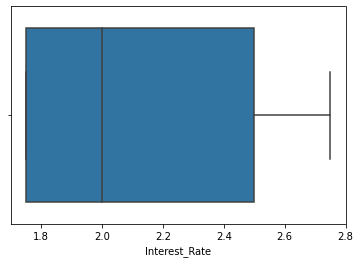

In [7]:
sns.boxplot(df['Interest_Rate']);

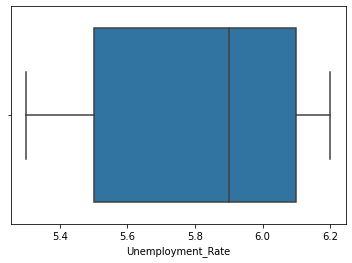

In [8]:
sns.boxplot(df['Unemployment_Rate']);

- 이상치 처리 작업은 진행하지 않음

### 상관관계 확인

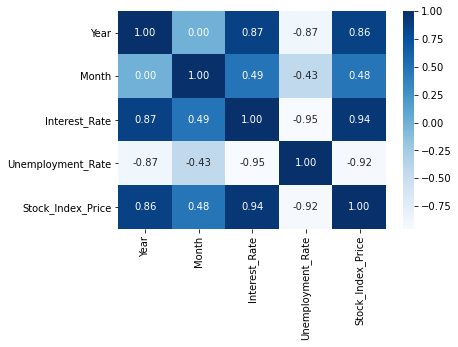

In [9]:
sns.heatmap(df.corr(), cmap = 'Blues', annot=True, fmt='.2f');

- Year은 다른 독립변수와의 상관관계가 높아서, 다중공선성을 우려하여 독립변수에서 제외
- Month는 다른 변수들과의 상관관계가 비교적 낮고, 종속변수 예측에 미치는 영향이 작을 것이라는 판단 하에 독립변수에서 제외

## 데이터 전처리

### 결측치 처리

In [10]:
# 결측치를 해당 컬럼의 평균치로 대체
df['Interest_Rate'] = df['Interest_Rate'].fillna(df['Interest_Rate'].mean())
df['Unemployment_Rate'] = df['Unemployment_Rate'].fillna(df['Unemployment_Rate'].mean())

In [11]:
# 결측치 처리 결과 확인
df.isna().sum()

Year                 0
Month                0
Interest_Rate        0
Unemployment_Rate    0
Stock_Index_Price    0
dtype: int64

## 데이터 분리
- 독립변수 : Interest_Rate, Unemployment_Rate
- 종속변수 : Stock_Index_Price

In [12]:
# X에 독립변수, y에 종속변수로 데이터 분리
X = df[['Interest_Rate', 'Unemployment_Rate']]
y = df['Stock_Index_Price']

## 상수항 추가
- 다중회귀분석을 위한 상수항 추가

In [13]:
X1 = sm.add_constant(X, has_constant = 'add')
X1.head()

,const,Interest_Rate,Unemployment_Rate
0,1.0,2.75,5.3
1,1.0,2.50,5.3
2,1.0,2.50,5.3
3,1.0,2.50,5.3
4,1.0,2.50,5.4


## 모델 생성 및 학습

In [14]:
model = sm.OLS(y, X1).fit()

## 결과 분석

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     73.73
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           3.20e-10
Time:                        03:20:44   Log-Likelihood:                -136.97
No. Observations:                  24   AIC:                             279.9
Df Residuals:                      21   BIC:                             283.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1811.9849   1125.495      1.610      0.122    -528.609    4152.579
Interest_Rate       351.5795    140.141      2.509      0.020      60.140     643.019
Unemployment_Rate  -255.5481    145.686     -1.754      0.094    -558.519      47.423
==============================================================================
Omnibus:                        1.262   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.167
Skew:                          -0.460   Prob(JB):                        0.558
Kurtosis:                       2.433   Cond. No.                         449.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <분석 결과 해석>
- F통계량이 73.73이고 p-값이 3.20e-10으로 유의수준 0.05에서 추정된 회귀모형이 통계적으로 유의하다.
- Adj. R-squared는 0.863으로 X가 설명하는 y의 변동성이 약 86.3%라고 할 수 있다.
- Interest_Rate의 회귀계수의 p-값은 유의수준 0.05에서 유의하며, Unemployment_Rate의 회귀계수의 p-값은 유의수준 0.1에서 유의하다.
- Interest_Rate의 회귀계수는 351.58로 Interest_Rate가 1단위 증가하면 종속변수는 351.58만큼 증가한다.
- Unemployment_Rate의 회귀계수는 -255.55로 Unemployment_Rate가 1단위 증가하면 종속변수는 255.55만큼 감소한다.
- 이때 Interest_Rate의 회귀계수의 절댓값이 더 크기 때문에 종속변수에 더 큰 영향을 준다고 할 수 있다.

# 2. Stock_Index_Price 예측
- 임의의 Interest_Rate(2.05)와 Unemployment_Rate(5.75)가 주어졌을 때의 Stock_Index_Price의 값은 얼마인지 구하시오.

In [16]:
# 주어진 값을 변수에 저장
int_rate = 2.05
unem_rate = 5.75

In [17]:
# 주어진 값과 회귀계수를 곱하고, 상수항을 더하여 예측
stock_price = (351.58*int_rate) + (-255.55*unem_rate) + 1811.98

# 예측 결과의 출력 - 소수점 아래 둘째자리까지 표시
print('Stock_Index_Price의 예측값 : ', round(stock_price,2))

Stock_Index_Price의 예측값 :  1063.31


# 3. 회귀선 그래프
- 1번에서 구해진 결과를 이용하여 종속변수에 가장 큰 영향력을 미치는 변수와의 회귀선을 그래프로 나타내시오.

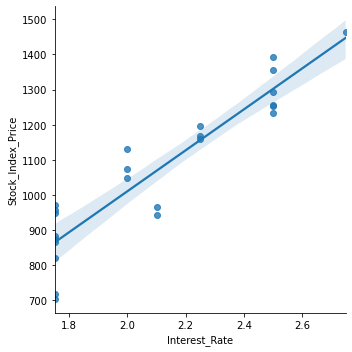

In [18]:
# 가장 큰 영향력을 미치는 변수는 Interest_Rate
sns.lmplot(x = 'Interest_Rate', y = 'Stock_Index_Price', data = df);